# Лабораторная работа №1. Машинное обучение

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel

## 0. Первичный анализ и оценка данных

In [ ]:
data = pd.read_csv('./data_lab_1.csv')

In [4]:
data

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.0,8,False,25.00,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.6,1,False,11.00,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.00,2,NaN,5.0,34.3,4,False,8.30,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.0,13,False,41.00,NaN,31856.0,8098.0,112.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.70,5.0,73.3,3,False,13.83,NaN,24665.0,4232.0,796.0,381.0
23695,3100000.0,59.00,3,NaN,5.0,38.0,4,False,8.50,NaN,NaN,NaN,NaN,NaN
23696,2500000.0,56.70,2,NaN,3.0,29.7,1,False,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,2,3.00,17.0,NaN,12,False,23.30,2.0,39140.0,10364.0,173.0,196.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


In [6]:
data.describe()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,8079.000000,9110.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,490.804555,517.980900
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,342.317995,277.720643
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,1.000000,13.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,288.000000,294.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,455.000000,502.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,612.000000,729.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3190.000000,1344.000000


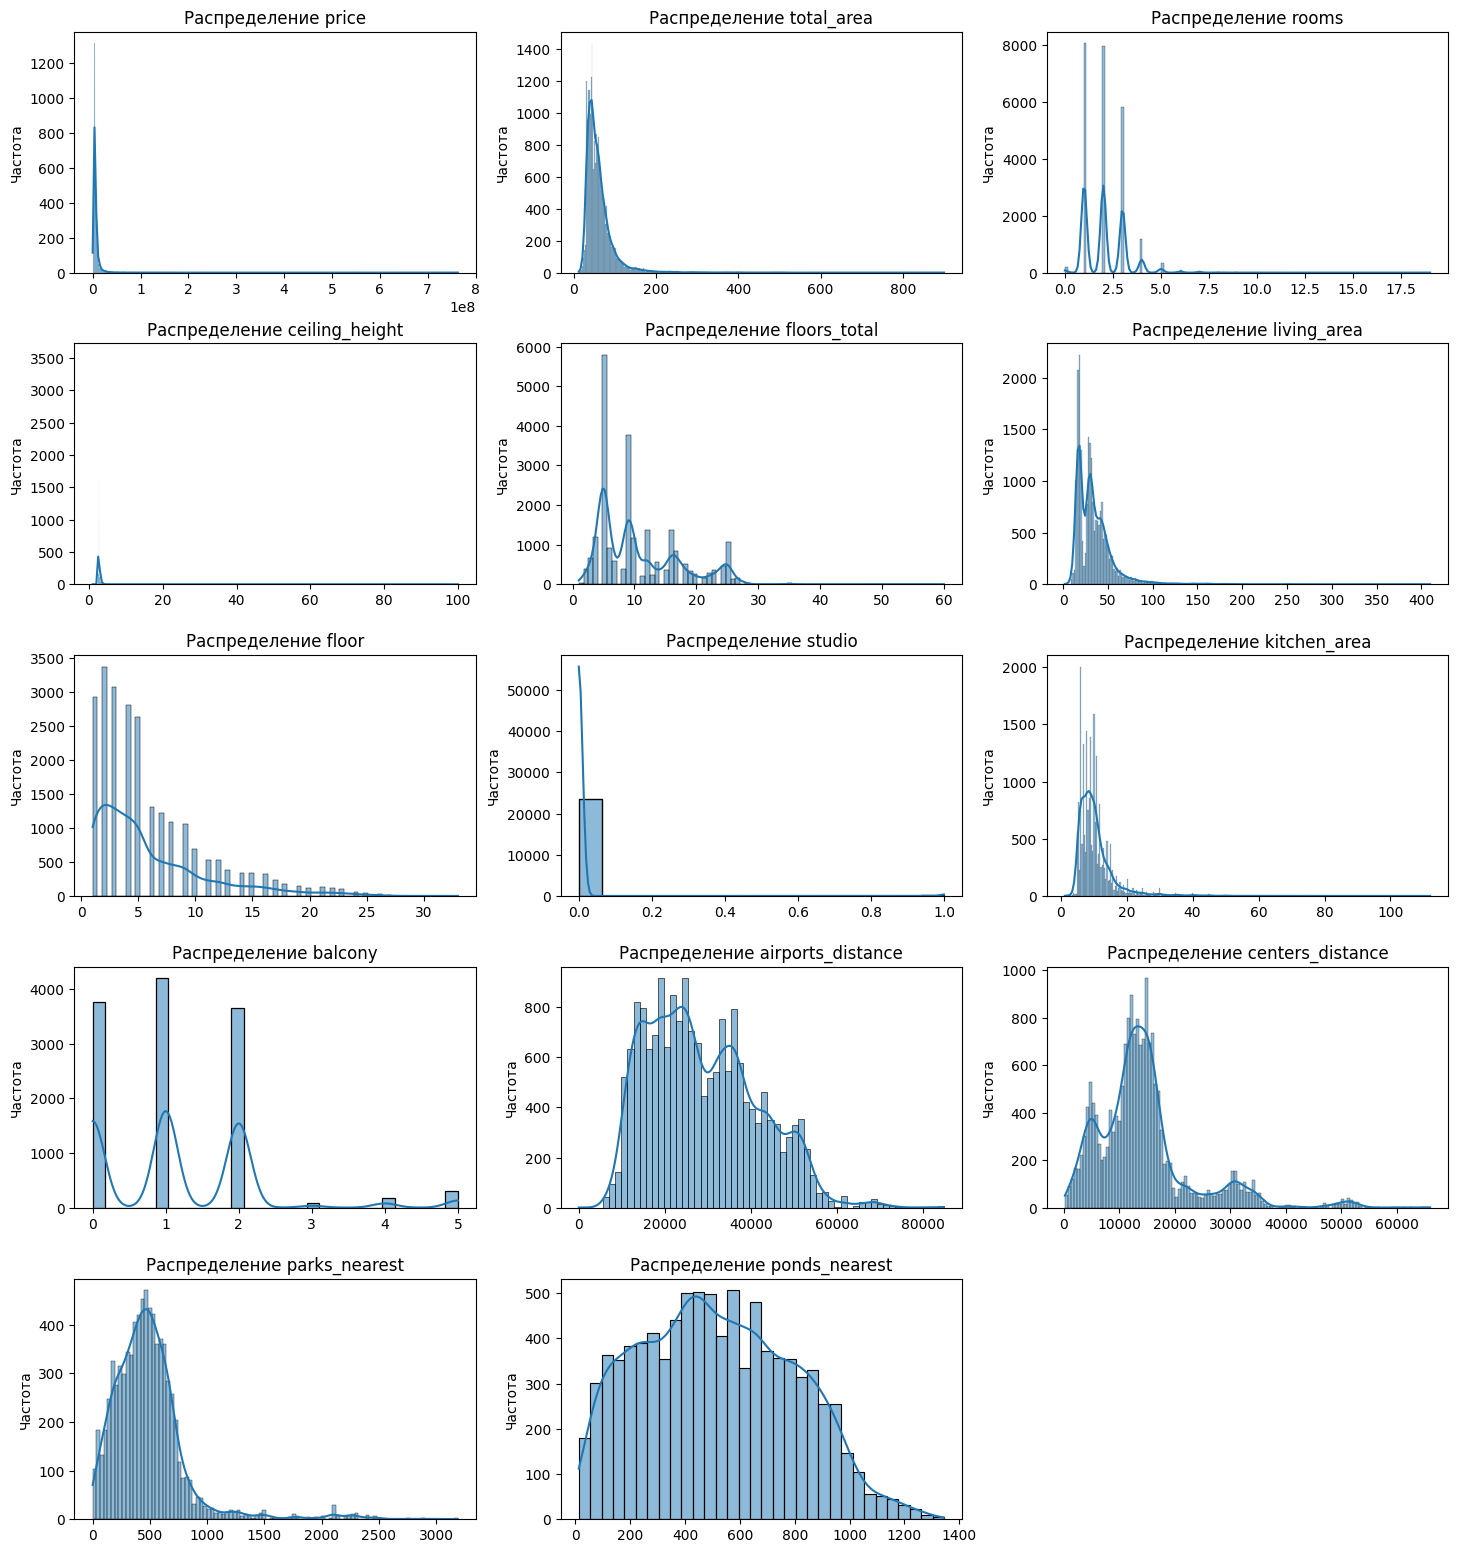

In [7]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")


for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

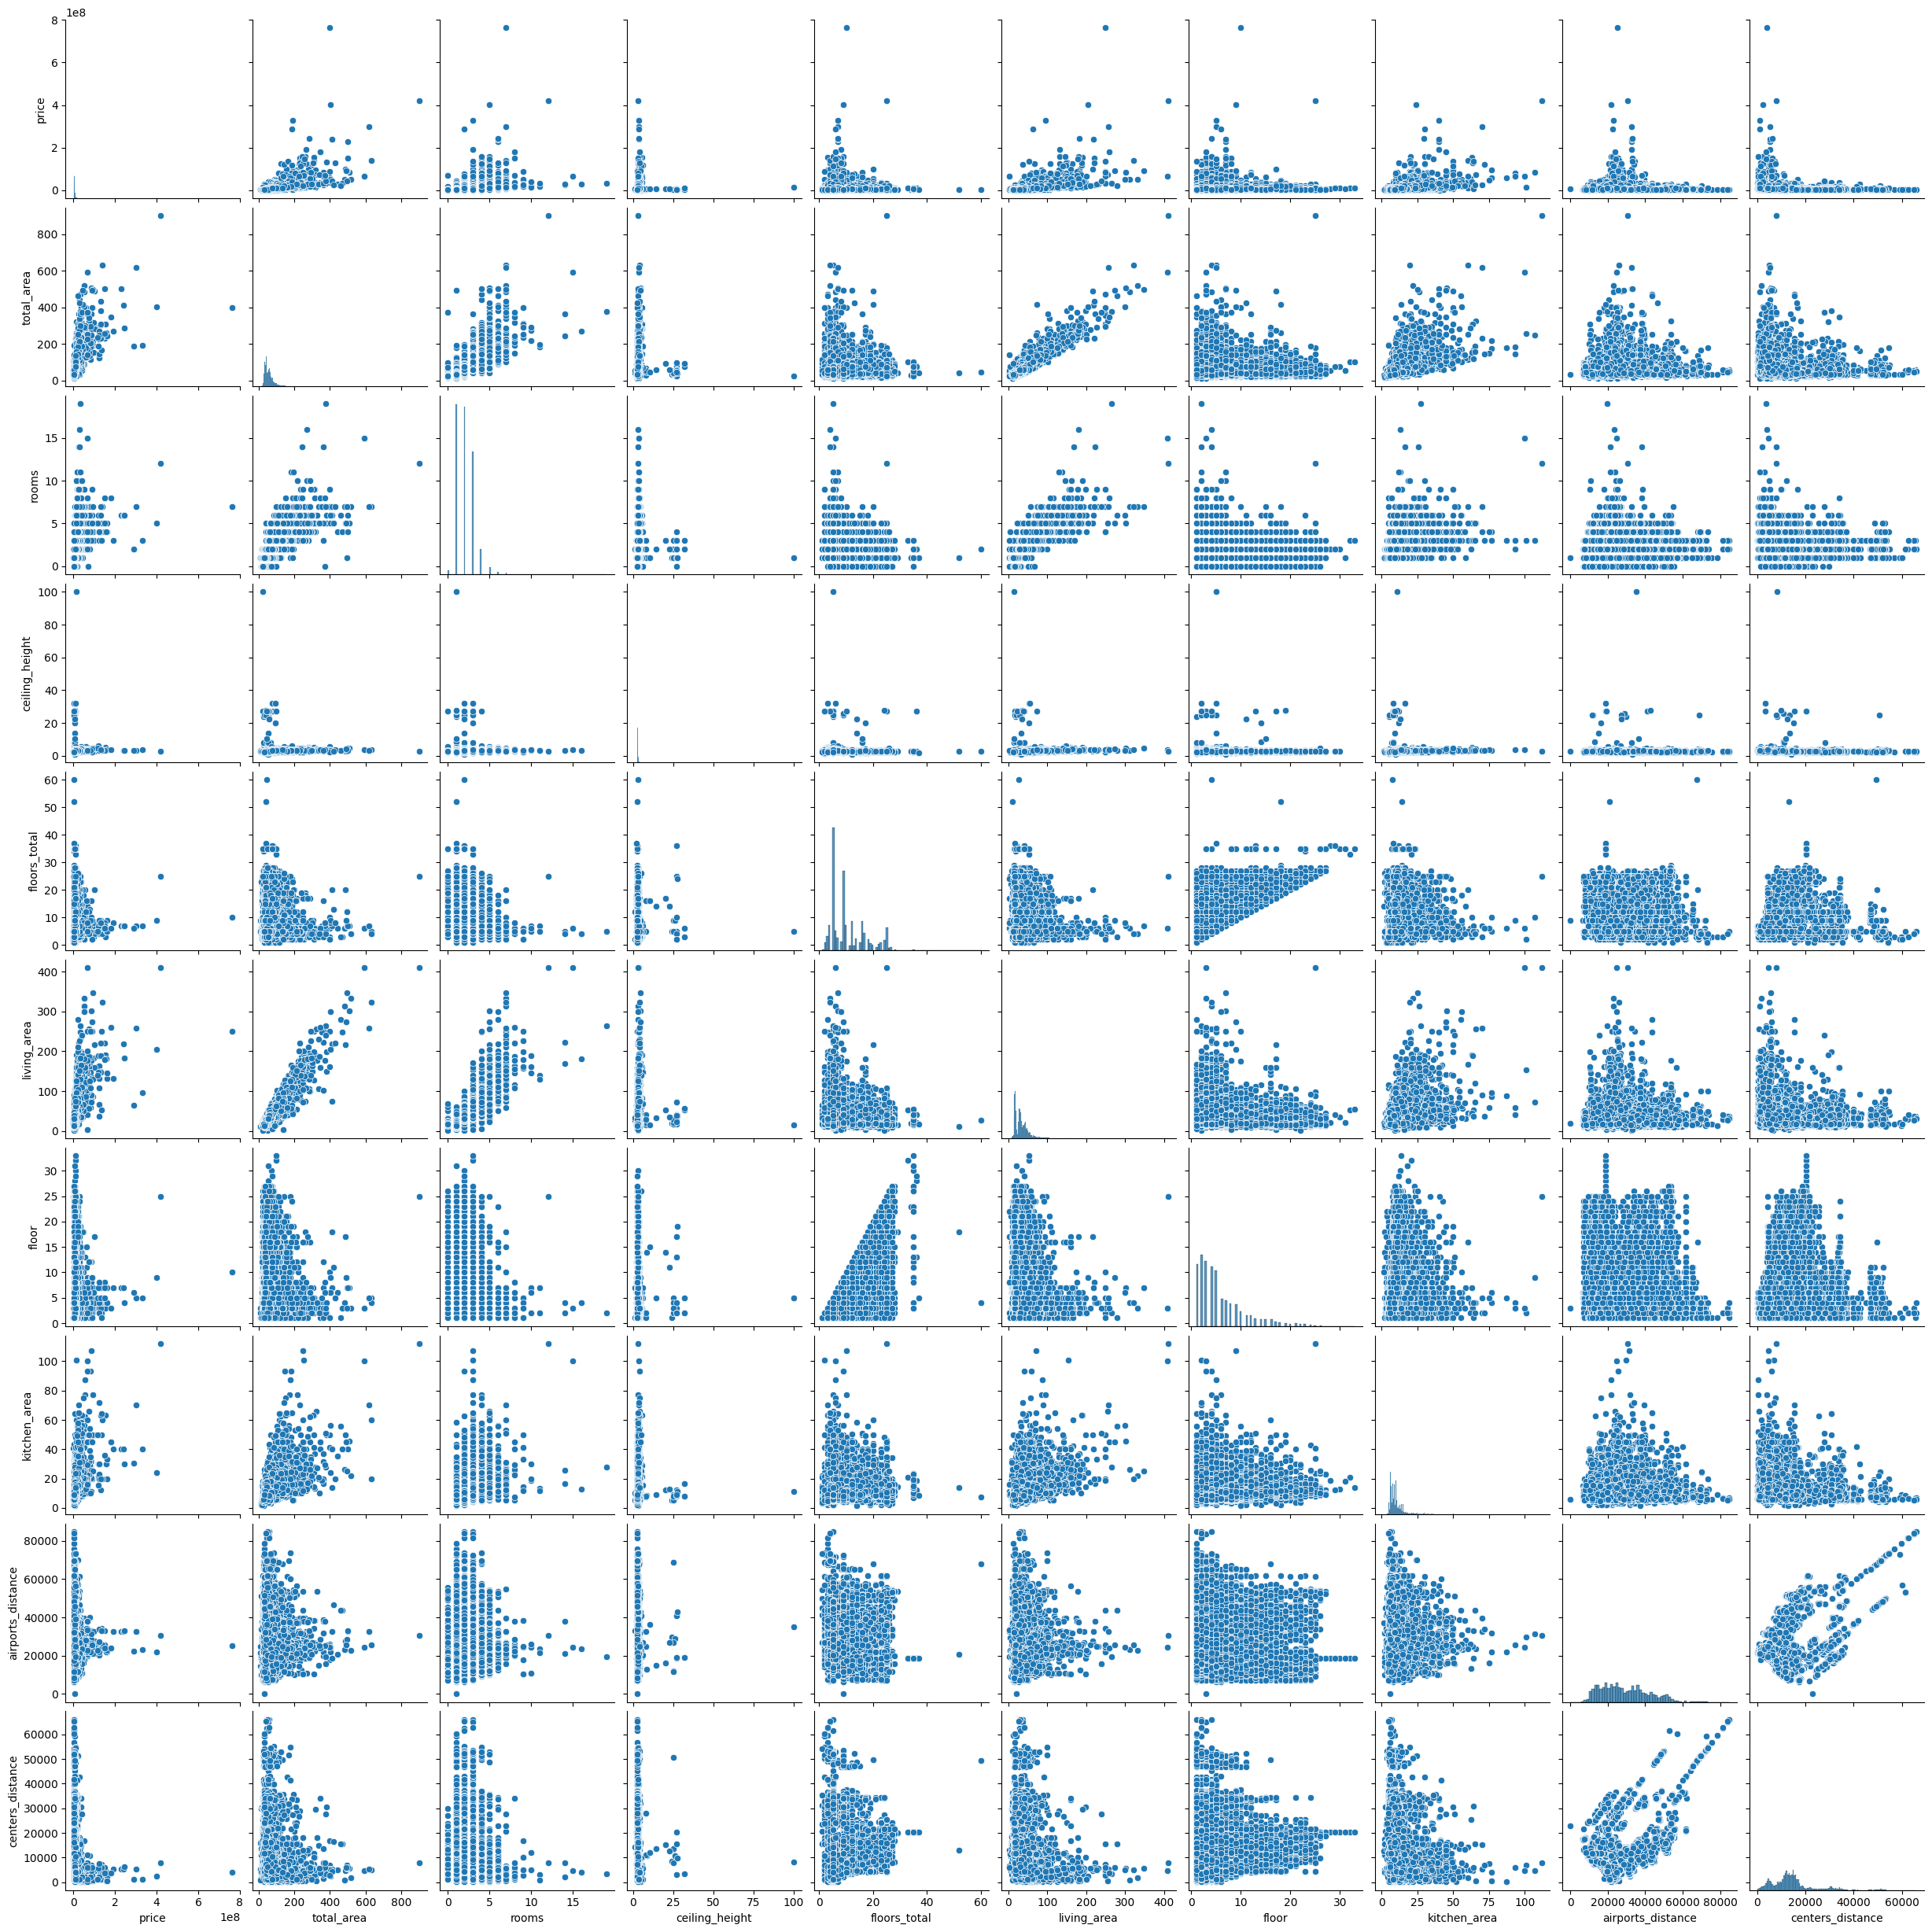

In [9]:
selected_features = ['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area',
                     'airports_distance', 'centers_distance']
sns.pairplot(data[selected_features])
plt.show()

## 1. Проверка соответствия типов данных

Видим, что признак **studio** представлен в булевом типе, нам такое не надо, поэтому сделаем замену

In [ ]:
#data['studio'] = data['studio'].replace({True: 1, False: 0})
data['studio'] = data['studio'].astype(int)

In [ ]:
data['studio'].value_counts()

,count
studio,
0,23550
1,149


Также поменяем пропуски и приведем все признаки к числовому типу

In [ ]:
#for column in data.columns:
#   data.loc[:, column] = data[column].replace({pd.NA: np.nan})
#   data[column] = data[column].astype(str).str.replace(r'\D', '', regex=True)
   #data[column] = pd.to_numeric(data[column], errors='coerce')

Кроме того, по фрагменту данных выше можно сделать предположение о том, что признаки **price, floors_total, balcony, airports_distance, centers_distance, parks_nearest** и **ponds_nearest** могут быть преобразованы к целочисленному типу данных без потери информативности. Проверим эту гипотезу

Кроме прочего понадобилось преобразовать столбцы в массив numpy и временно удалить пропуски, чтобы корректно провести проверку

In [ ]:
#columns_is_int = ['price', 'floors_total', 'balcony', 'airports_distance', 'centers_distance', 'parks_nearest', 'ponds_nearest']
#for column in columns_is_int:
#    values = data[column].dropna().to_numpy()
#    if np.any(np.modf(values)[0] != 0):
#            print(f'В столбце {column} есть значения с дробной частью')
#    else:
#            print(f'В столбце {column} все значения целые')

Таким образом, мы можем преобразовать эти столбцы к целочисленному типу данных, что позволит как минимум экономить память. Понятно, что на практике такое преобразование может быть вредным, ведь расстояние, например, может быть представлено и дробным числом, но в рамках данной лабораторной работы можно считать такое преобразование оправданным.
Кроме прочего, если количество балконов и этажей будет дробным числом, то это в целом странно, поэтому для этих двух переменных преобразование точно применимо

In [ ]:
#for column in columns_is_int:
#     data[column] = data[column].round().astype('Int64')
# Используем 'Int64' для поддержки NaN

Однако в результате дальнейшей работы было выявлено, что такое преобразование доставляет некоторые проблемы при обработке данных, поэтому от него было решено отказаться

## 2. Обработка дубликатов

Как выяснилось, дубликат в датасете всего один, поэтому можем смело его удалить

In [ ]:
print(f'Количество дубликатов: {data.duplicated().sum()}')
data = data.drop_duplicates()

Количество дубликатов: 1


## 3. Обработка пропущенных значений

Сначала посмотрим общее распределение пропусков по столбцам, а также количество строк с разным количеством пропусков

In [ ]:
nan_count = data.isnull().sum()
total = len(data)
nan_percentage = (nan_count / total) * 100
nan_info = pd.DataFrame({
    'Количество пропусков': nan_count,
    'Процент пропусков': nan_percentage
})
print(nan_info)

                   Количество пропусков  Процент пропусков
price                                 0           0.000000
total_area                            0           0.000000
rooms                                 0           0.000000
ceiling_height                     9195          38.800743
floors_total                         86           0.362900
living_area                        1903           8.030214
floor                                 0           0.000000
studio                                0           0.000000
kitchen_area                       2277           9.608406
balcony                           11518          48.603258
airports_distance                  5541          23.381720
centers_distance                   5518          23.284665
parks_nearest                     15619          65.908515
ponds_nearest                     14588          61.557937


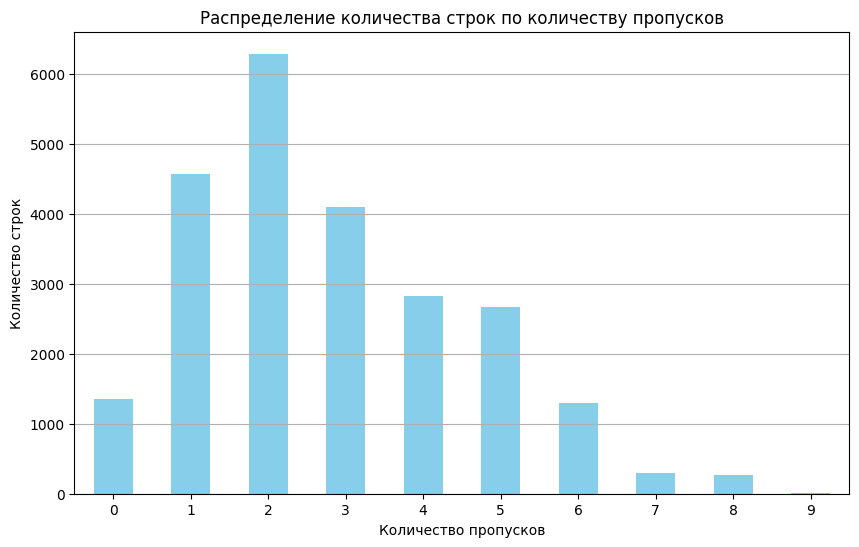

In [ ]:
nan_count_line = data.isnull().sum(axis=1)
data_nan = nan_count_line.value_counts().sort_index()
nan_count_line

plt.figure(figsize=(10, 6))
data_nan.plot(kind='bar', color='skyblue')
plt.title('Распределение количества строк по количеству пропусков')
plt.xlabel('Количество пропусков')
plt.ylabel('Количество строк')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Посмотрим, что за строки с 9 пропусками

In [ ]:
data[nan_count_line > 8]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
3831,4850000.0,37.40,1,NaN,NaN,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN
4901,2200000.0,24.00,0,NaN,NaN,NaN,6,1,NaN,NaN,NaN,NaN,NaN,NaN
5187,3300000.0,25.40,0,NaN,NaN,NaN,15,1,NaN,NaN,NaN,NaN,NaN,NaN
9023,2900000.0,35.10,1,NaN,NaN,NaN,11,0,NaN,NaN,NaN,NaN,NaN,NaN
14094,3290000.0,33.00,1,NaN,NaN,NaN,17,0,NaN,NaN,NaN,NaN,NaN,NaN
20738,4480000.0,54.22,2,NaN,NaN,NaN,10,0,NaN,NaN,NaN,NaN,NaN,NaN


Во-первых, пропусков достаточно много, поэтому удалять их все - не вариант, так как тогда останется только около 1500 записей. Во-вторых, большая часть строк с пропусками содержит их всего по 1-2, поэтому будем пытаться восстанавливать.

В общем у нас 9 разных признаков с разным количеством пропусков, проанализируем каждый из них подробнее:

1. Признак **ceiling_height** - заменим пропуски модой, на среднее могут влиять выбросы и аномалии, поэтому мода в данном случае более стабильный и надежный статистический показатель.
2. Признак **floors_total** - была попытка заменить средним значением этого параметра (floors_total) для всех квартир, расположенных на таком же этаже (признак floor), как и каждая конкретная квартира, у которой есть пропуск в данном столбце. Но попытка к успеху не привела, поэтому было решено использовать модель линейной регрессии для восстановления пропущенных значений в общем количестве этажей в зависимости от этажа, на котором расположена квартира.
3. Признак **living_area** - для заполнения пропусков в этом столбце предположим, что жилая площадь квартиры связана с общей площадью линейной зависимостью (это исллюстрирует диаграмма рассеивания ниже), таким образом, мы можем получить необходимые коэффициенты и, так как у нас есть все значения в столбце total_area - заполнить пропуски в living_area.
4. Признак **kitchen_area** - здесь, во-первых, путем эксперимента было выяснено, что все квартиры, которые отмечены, как студии, имеют пропуски в признаке "площадь кухни", что в целом логично. Поэтому сначала для всех студий заполним пропуски в данном столбце на 0. Затем снова проведем восстановление пропущенных значений, используя модель линейной регресси для поиска коэффициентов, предполагая, что есть некоторая линейная зависимость между признаками total_area, living_area и искомым kitchen_area.
5. Признак **balcony** - самый очевидный, если не отмечено количество балконов, то, скорее всего, их нет совсем, поэтому тут заменим пропуски нулями.
6. Признак **airports_distance** - заменим средним, так как сложно найти какую-либо корреляцию между этим признаком и остальными. Здесь большие расстояния вполне могут быть, поэтому моду не используем.
7. Признак **centers_distance** - тоже заменим средним, как и в предыдущем пункте.
8. Признак **parks_nearest** - очень большое количество пропусков, поэтому была попытка восстановить значения с помощью модели регрессии в зависимости от расстояний до аэропорта и центра. Но восстановить не вышло, поэтому просто удаляем
9. Признак **ponds_nearest** - тоже более 50% пропусков, поэтому пока что удаляем




### Работа с ceiling_height

In [ ]:
mode_ceiling_height = data['ceiling_height'].mode()[0]
data.loc[:, 'ceiling_height'] = data['ceiling_height'].fillna(mode_ceiling_height)

### Работа с floors_total

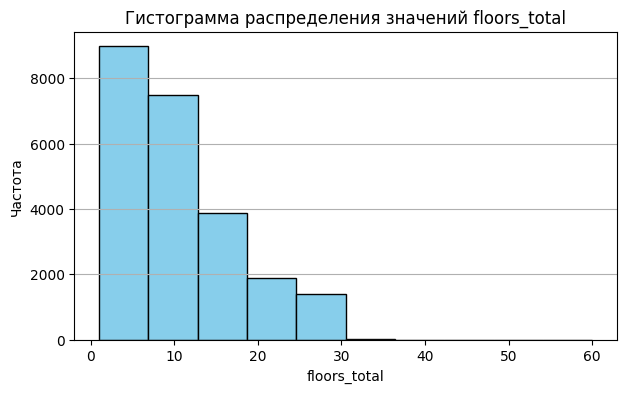

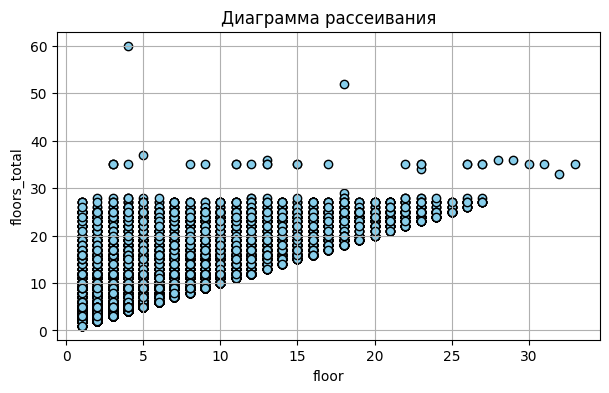

In [ ]:
# Построение гистограммы распределения значений признака floor_total
plt.figure(figsize=(7, 4))
data['floors_total'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения значений floors_total')
plt.xlabel('floors_total')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

# Построение диаграммы рассеивания между floor и floors_total
plt.figure(figsize=(7, 4))
plt.scatter(data['floor'], data['floors_total'], color='skyblue', edgecolor='black')
plt.title('Диаграмма рассеивания')
plt.xlabel('floor')
plt.ylabel('floors_total')
plt.grid(True)
plt.show()

In [ ]:
data_clean = data.dropna(subset=['floors_total'])

X = data_clean[['floor']]
y = data_clean['floors_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficient = model.coef_[0]
intercept = model.intercept_
print(f'Коэффициент: {coefficient}, Свободный член: {intercept}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

nan_data = data['floors_total'].isnull()
data.loc[nan_data, 'floors_total'] = model.predict(data.loc[nan_data, ['floor']])

Коэффициент: 0.9188984873450077, Свободный член: 5.26993984407848
MAE: 3.680397815756163
MSE: 23.612439171438094


Таким образом, в среднем предсказания модели для общего количества этажей отличаются на 3.6 этажей, что довольно неплохо. В дальшейшем можно попробовать настроить гиперпараметры или использовать более сложные модели для улучшения точности предсказаний.

In [ ]:
data['floors_total'].describe()

,floors_total
count,23698.000000
mean,10.687328
std,6.597993
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


### Работа с living_area

In [ ]:
data['living_area'].describe()

,living_area
count,21795.000000
mean,34.458525
std,22.030727
min,2.000000
25%,18.600000
50%,30.000000
75%,42.300000
max,409.700000


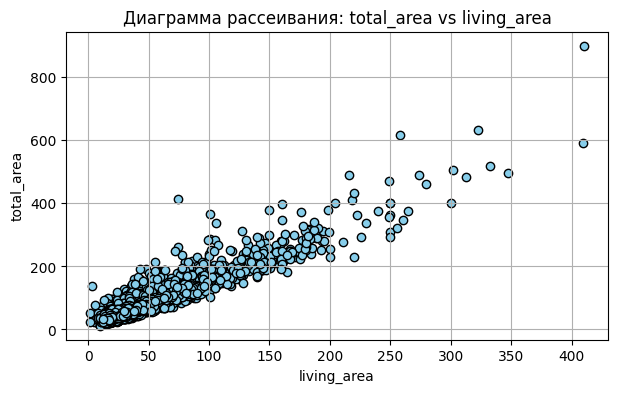

In [ ]:
plt.figure(figsize=(7, 4))
plt.scatter(data['living_area'], data['total_area'], color='skyblue', edgecolor='black')
plt.title('Диаграмма рассеивания: total_area vs living_area')
plt.xlabel('living_area')
plt.ylabel('total_area')
plt.grid(True)
plt.show()

In [ ]:
data_clean = data.dropna(subset=['living_area'])

X = data_clean[['total_area']]
y = data_clean['living_area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficient = model.coef_[0]
intercept = model.intercept_
print(f'Коэффициент: {coefficient}, Свободный член: {intercept}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

# Заполняем пропуски в жилой площади
nan_data = data['living_area'].isnull()
data.loc[nan_data, 'living_area'] = model.predict(data.loc[nan_data, ['total_area']])

Коэффициент: 0.597959511551718, Свободный член: -1.431551802229734
MAE: 4.934850208326828
MSE: 55.24258678644225


Ошибка предсказания жилой площади составляет около 5 квадратных метров. Далее можно будет так же, как и в предыдущем случае, попробовать добиться более высокой точности.

In [ ]:
data['living_area'].describe()

,living_area
count,23698.000000
mean,34.616929
std,22.471314
min,2.000000
25%,19.000000
50%,30.000000
75%,42.200000
max,409.700000


### Работа с kitchen_area

In [ ]:
data[(data['studio'] > 0) & (data['kitchen_area'] > 0)]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest


In [ ]:
data.loc[(data['studio'] == 1) & (data['kitchen_area'].isnull()), 'kitchen_area'] = 0

In [ ]:
data['kitchen_area'].describe()

,kitchen_area
count,21570.000000
mean,10.496794
std,5.949767
min,0.000000
25%,7.000000
50%,9.010000
75%,12.000000
max,112.000000


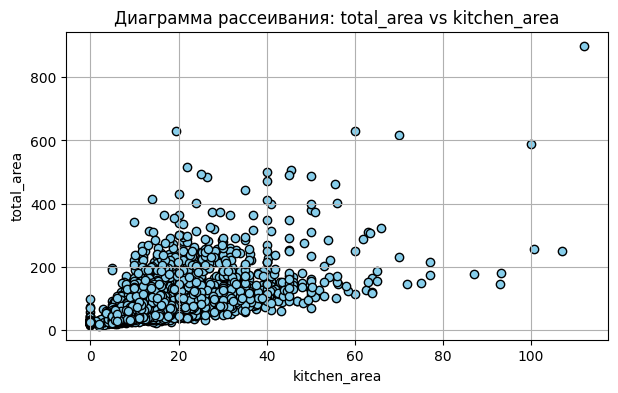

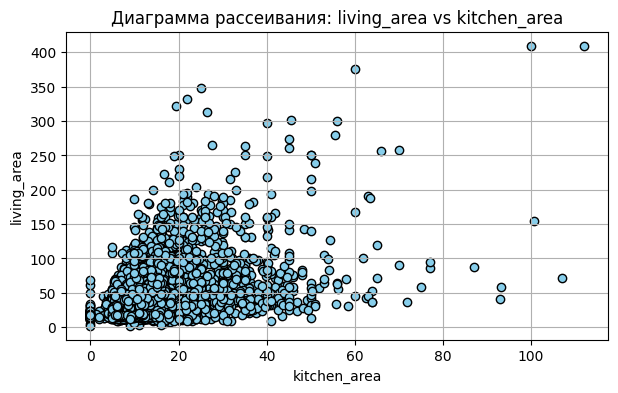

In [ ]:
plt.figure(figsize=(7, 4))
plt.scatter(data['kitchen_area'], data['total_area'], color='skyblue', edgecolor='black')
plt.title('Диаграмма рассеивания: total_area vs kitchen_area')
plt.xlabel('kitchen_area')
plt.ylabel('total_area')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.scatter(data['kitchen_area'], data['living_area'], color='skyblue', edgecolor='black')
plt.title('Диаграмма рассеивания: living_area vs kitchen_area')
plt.xlabel('kitchen_area')
plt.ylabel('living_area')
plt.grid(True)
plt.show()

In [ ]:
data_clean = data[(data['studio'] == 0) & (data['kitchen_area'].notnull())]

X = data_clean[['living_area', 'total_area']]
y = data_clean['kitchen_area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_
print(f'Коэффициенты: {coefficients}, Свободный член: {intercept}')

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

nan_data = data['kitchen_area'].isnull() & (data['studio'] == 0)
data.loc[nan_data, 'kitchen_area'] = model.predict(data.loc[nan_data, ['living_area', 'total_area']])

Коэффициенты: [-0.33063098  0.30096127], Свободный член: 3.782091820582073
MAE: 2.154200495992002
MSE: 16.497102485809894


В серднем ошибка предсказания площади кухни составляет примерно 2 квадратных метра, что даже лучше, чем в предыдущем случае. Скорее всего это связано с обученим модели на двух признаках вместо одного.

In [ ]:
data['kitchen_area'].describe()

,kitchen_area
count,23698.000000
mean,10.461755
std,5.839696
min,0.000000
25%,7.015085
50%,9.100000
75%,11.900000
max,112.000000


### Работа с balcony

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

<ipython-input-437-9374f0e6c999>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].fillna(0)


In [ ]:
data['balcony'].value_counts()

,count
balcony,
0.0,15276
1.0,4195
2.0,3659
5.0,304
4.0,183
3.0,81


### Работа с airports_distance

In [ ]:
median_airports_distance = data['airports_distance'].median()
data['airports_distance'] = data['airports_distance'].fillna(median_airports_distance)

<ipython-input-439-68af12f48791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airports_distance'] = data['airports_distance'].fillna(median_airports_distance)


In [ ]:
data['airports_distance'].describe()

,airports_distance
count,23698.000000
mean,28310.214870
std,11090.559387
min,0.000000
25%,21181.000000
50%,26726.000000
75%,34328.500000
max,84869.000000


### Работа с centers_distance

In [ ]:
mean_value = data['centers_distance'].mean()
data['centers_distance'] = data['centers_distance'].fillna(mean_value)

<ipython-input-441-c111552b5f57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['centers_distance'] = data['centers_distance'].fillna(mean_value)


In [ ]:
data['centers_distance'].describe()

,centers_distance
count,23698.000000
mean,14191.277833
std,7539.803953
min,181.000000
25%,10927.000000
50%,14191.277833
75%,15249.250000
max,65968.000000


### Попытки работы с parks_nearest

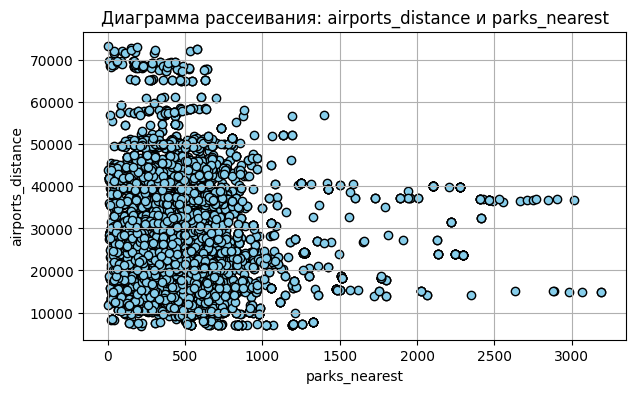

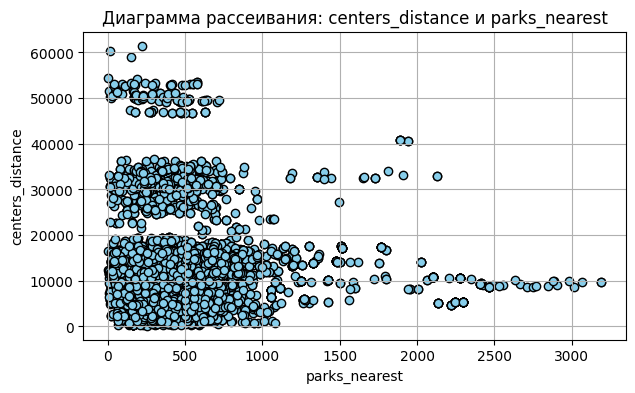

In [ ]:
plt.figure(figsize=(7, 4))
plt.scatter(data['parks_nearest'], data['airports_distance'], color='skyblue', edgecolor='black')
plt.title('Диаграмма рассеивания: airports_distance и parks_nearest')
plt.xlabel('parks_nearest')
plt.ylabel('airports_distance')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.scatter(data['parks_nearest'], data['centers_distance'], color='skyblue', edgecolor='black')
plt.title('Диаграмма рассеивания: centers_distance и parks_nearest')
plt.xlabel('parks_nearest')
plt.ylabel('centers_distance')
plt.grid(True)
plt.show()

Выявлена интересная особенность данных, как будто на второй диаграмме вырисовываются кластеры

In [ ]:
data = data.drop(columns=['parks_nearest', 'ponds_nearest'])

### Итоги работы с пропусками

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23698 entries, 0 to 23698
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23698 non-null  float64
 1   total_area         23698 non-null  float64
 2   rooms              23698 non-null  int64  
 3   ceiling_height     23698 non-null  float64
 4   floors_total       23698 non-null  float64
 5   living_area        23698 non-null  float64
 6   floor              23698 non-null  int64  
 7   studio             23698 non-null  int64  
 8   kitchen_area       23698 non-null  float64
 9   balcony            23698 non-null  float64
 10  airports_distance  23698 non-null  float64
 11  centers_distance   23698 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 2.4 MB


In [ ]:
data.describe()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
count,2.369800e+04,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000
mean,6.541718e+06,60.349404,2.070681,2.666164,10.687328,34.616929,5.892312,0.006287,10.461755,0.591105,28310.214870,14191.277833
std,1.088721e+07,35.654647,1.078405,0.995376,6.597993,22.471314,4.885347,0.079045,5.839696,0.959311,11090.559387,7539.803953
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,181.000000
25%,3.400000e+06,40.000000,1.000000,2.500000,5.000000,19.000000,2.000000,0.000000,7.015085,0.000000,21181.000000,10927.000000
50%,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,0.000000,9.100000,0.000000,26726.000000,14191.277833
75%,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.200000,8.000000,0.000000,11.900000,1.000000,34328.500000,15249.250000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,1.000000,112.000000,5.000000,84869.000000,65968.000000


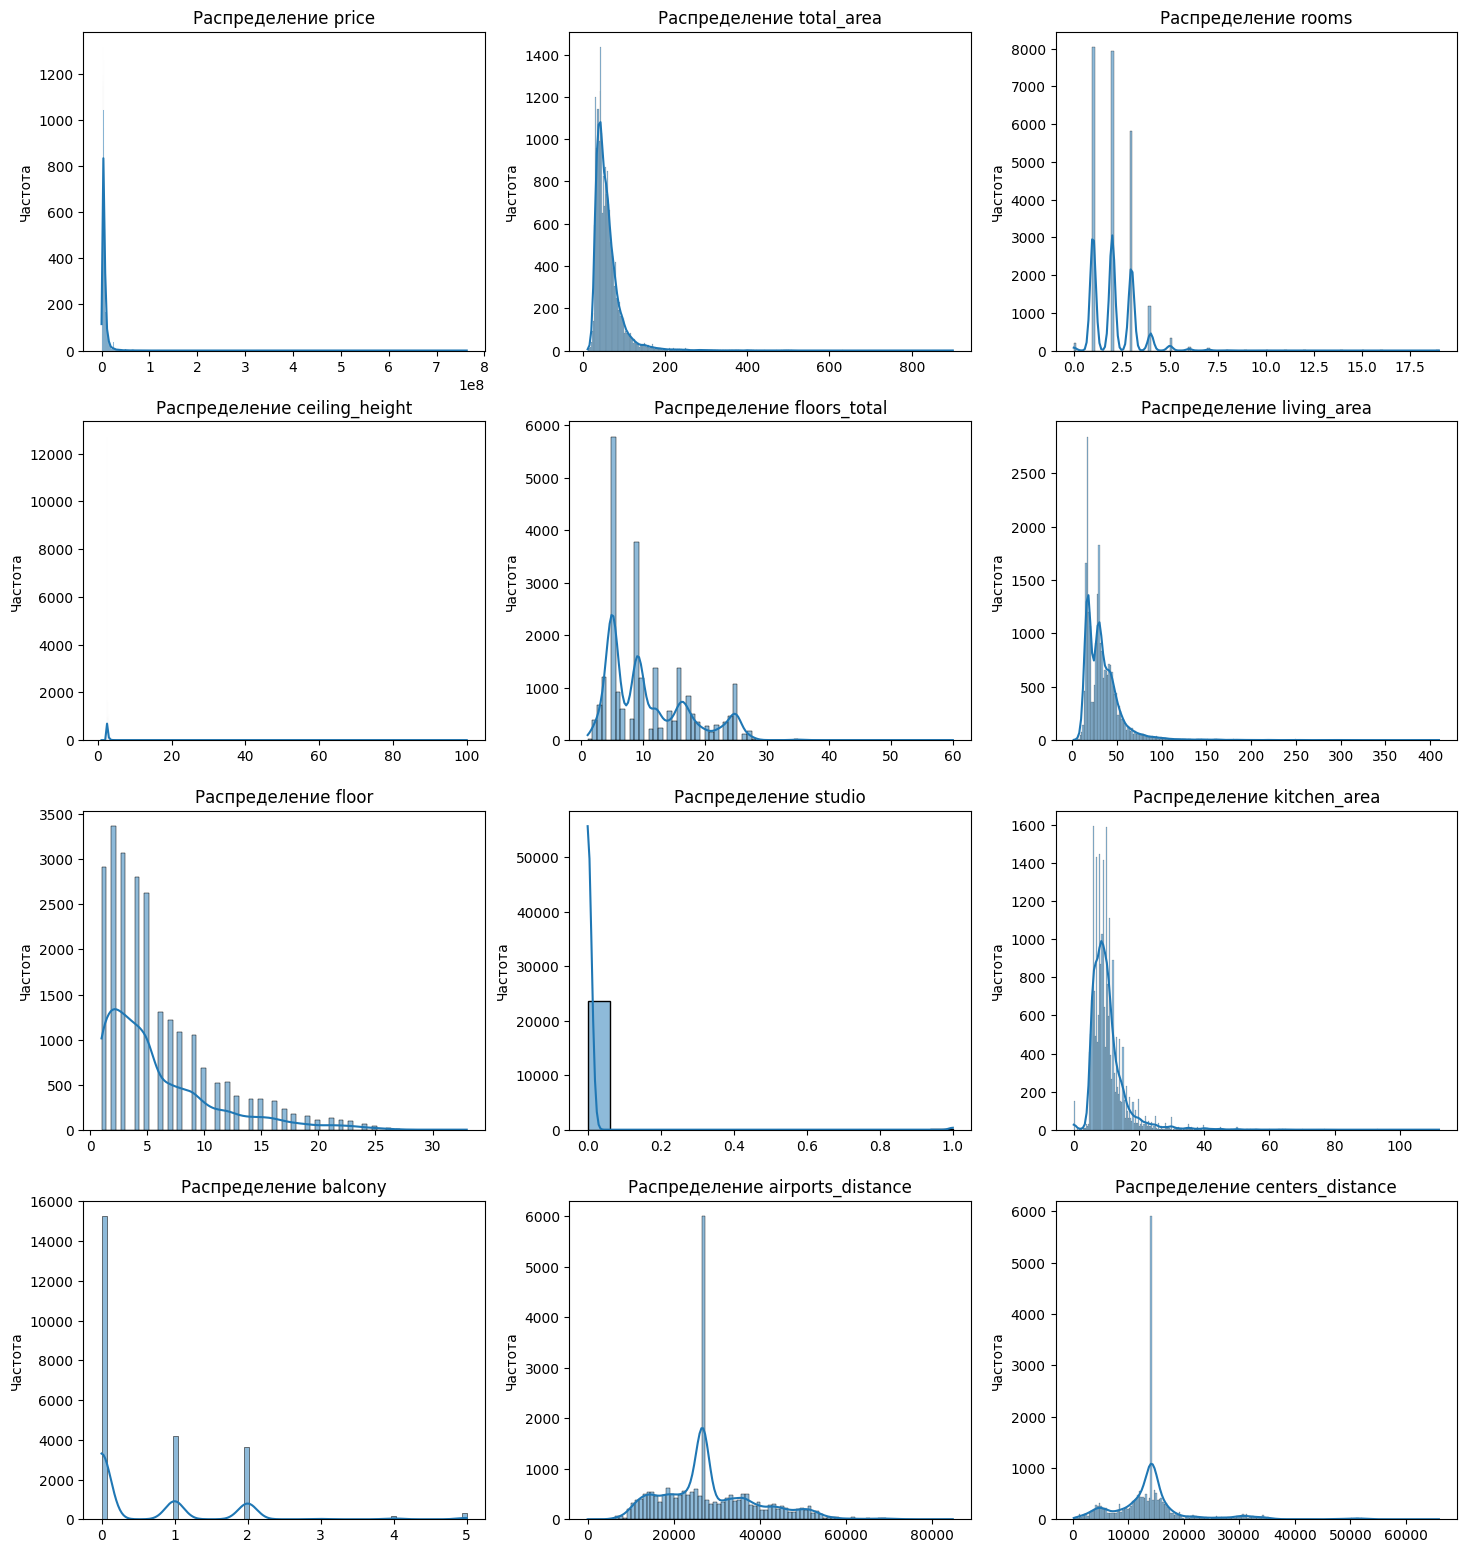

In [ ]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")


for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

## 4. Аномалии и выбросы

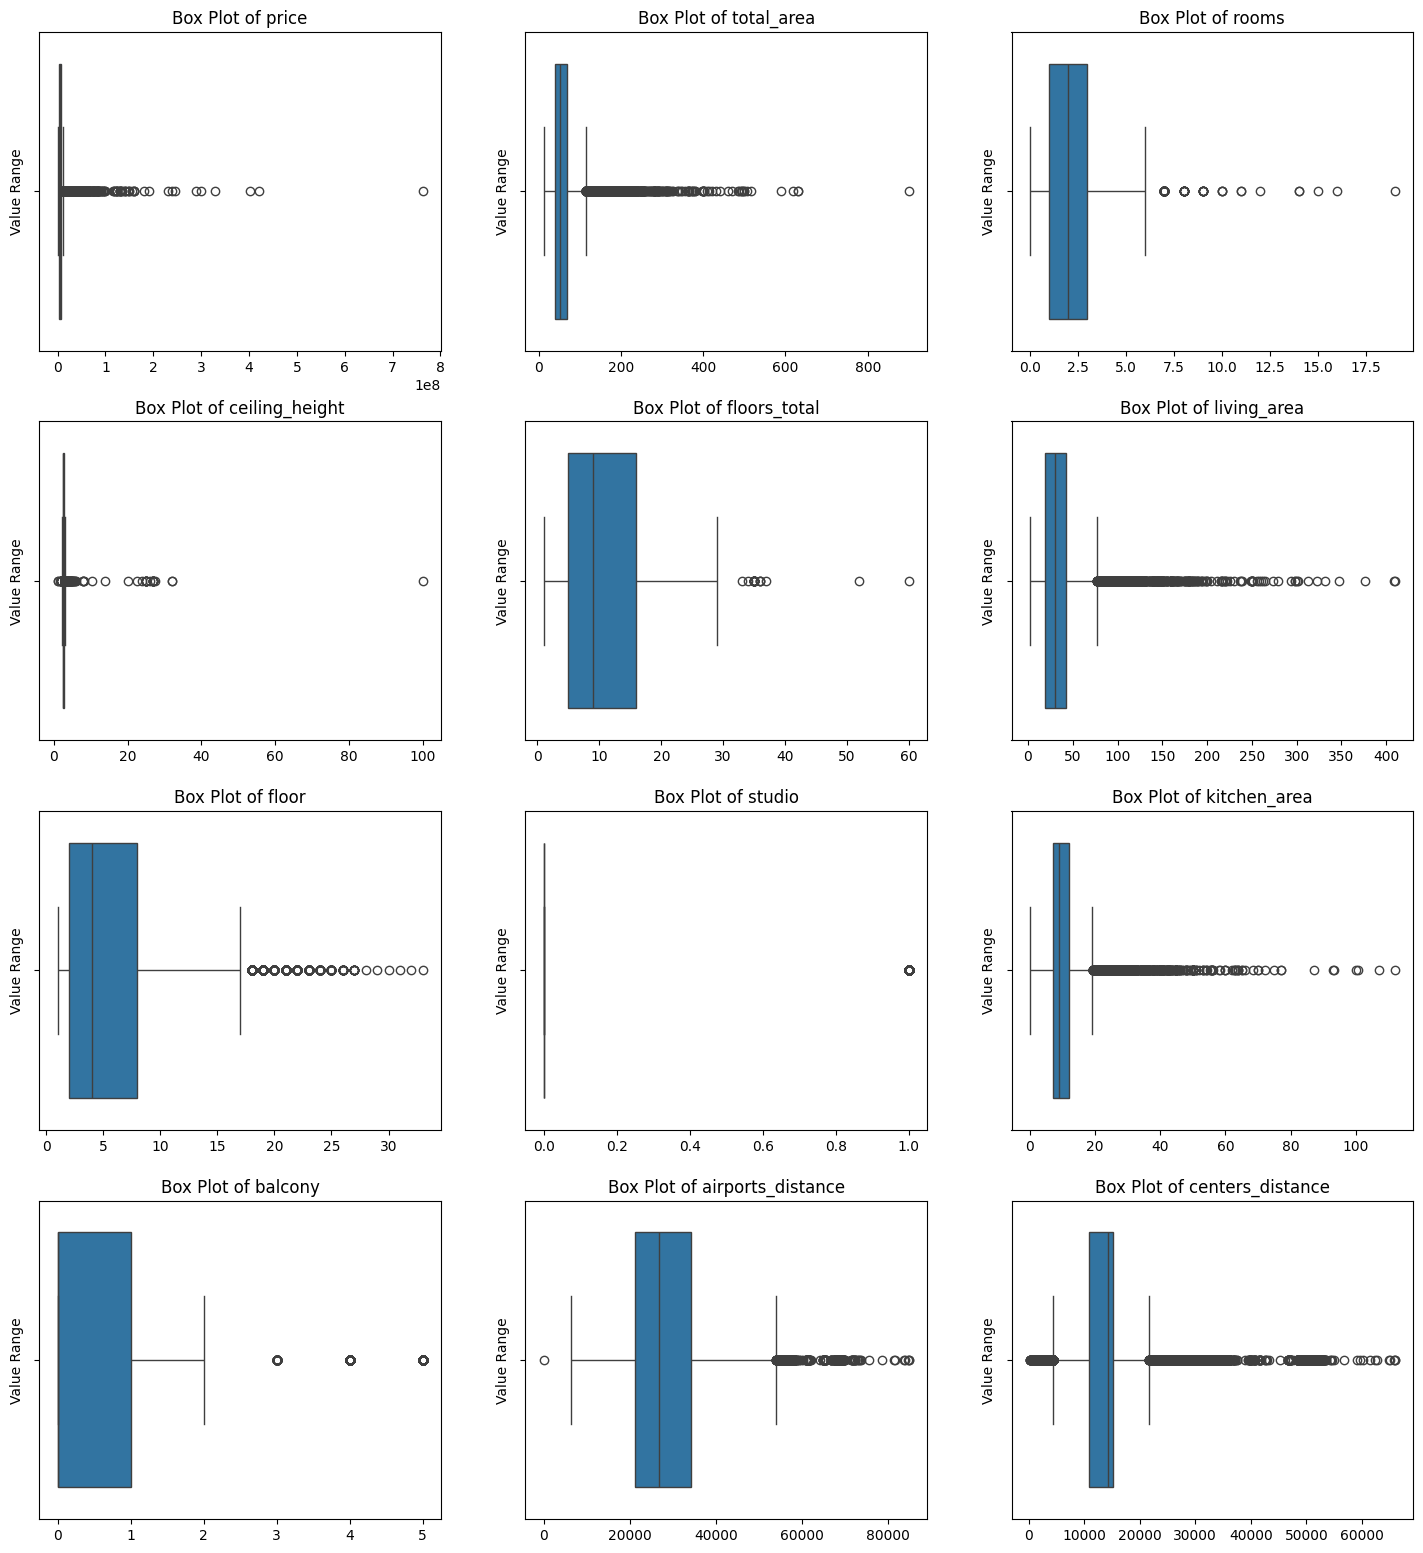

In [ ]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.boxplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

Возможные аномалии, которые стоит проверить:

*   жилая площадь квартиры или площадь кухни больше общей площади квартиры
*   этаж, на котором находится квартира, больше, чем общее количество этажей в здании
*   количество комнат в студии больше одной

Обязательно отсечь выбросы в признаках:

*   total_area
*   ceiling_height

В остальных признаках судя по диаграммам нет слишком критичных выбросов и отличающиеся от общей массы значения вполне можно логически обосновать. Например, квартиры могут находиться в поселках и тогда расстояния до аэропорта и центра ближайшего города действительно могут быть довольно большими.








Так как распределения большинства признаков в основном ненормальные, будем использовать для обнаружения выбросов метод IQR, так как он достаточно устойчив к колебаниям в данных.

In [ ]:
columns = ['total_area', 'ceiling_height']

for column in columns:
   Q1 = data[column].quantile(0.25)
   Q3 = data[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
   data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
outliers

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
4,10000000.0,100.0,2,3.03,14.0,32.0,13,0,41.0,0.0,31856.0,8098.0
16,6700000.0,82.0,3,3.05,5.0,55.6,1,0,9.0,0.0,22108.0,10698.0
117,8520000.0,84.7,3,3.20,5.0,55.9,4,0,8.4,1.0,37889.0,9816.0
135,3990000.0,48.0,1,3.25,5.0,20.5,1,0,17.0,0.0,57998.0,34928.0
136,6500000.0,51.8,2,3.45,6.0,25.6,2,0,7.3,1.0,20502.0,3618.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23631,14799000.0,104.0,3,3.10,4.0,66.0,2,0,14.0,1.0,39047.0,13944.0
23648,10100000.0,78.0,3,3.27,5.0,48.6,5,0,8.2,0.0,20933.0,1113.0
23664,9000000.0,110.0,4,3.36,7.0,64.6,5,0,15.8,0.0,26313.0,5016.0
23667,9990000.0,90.0,3,3.06,17.0,55.0,9,0,11.0,2.0,56343.0,33272.0


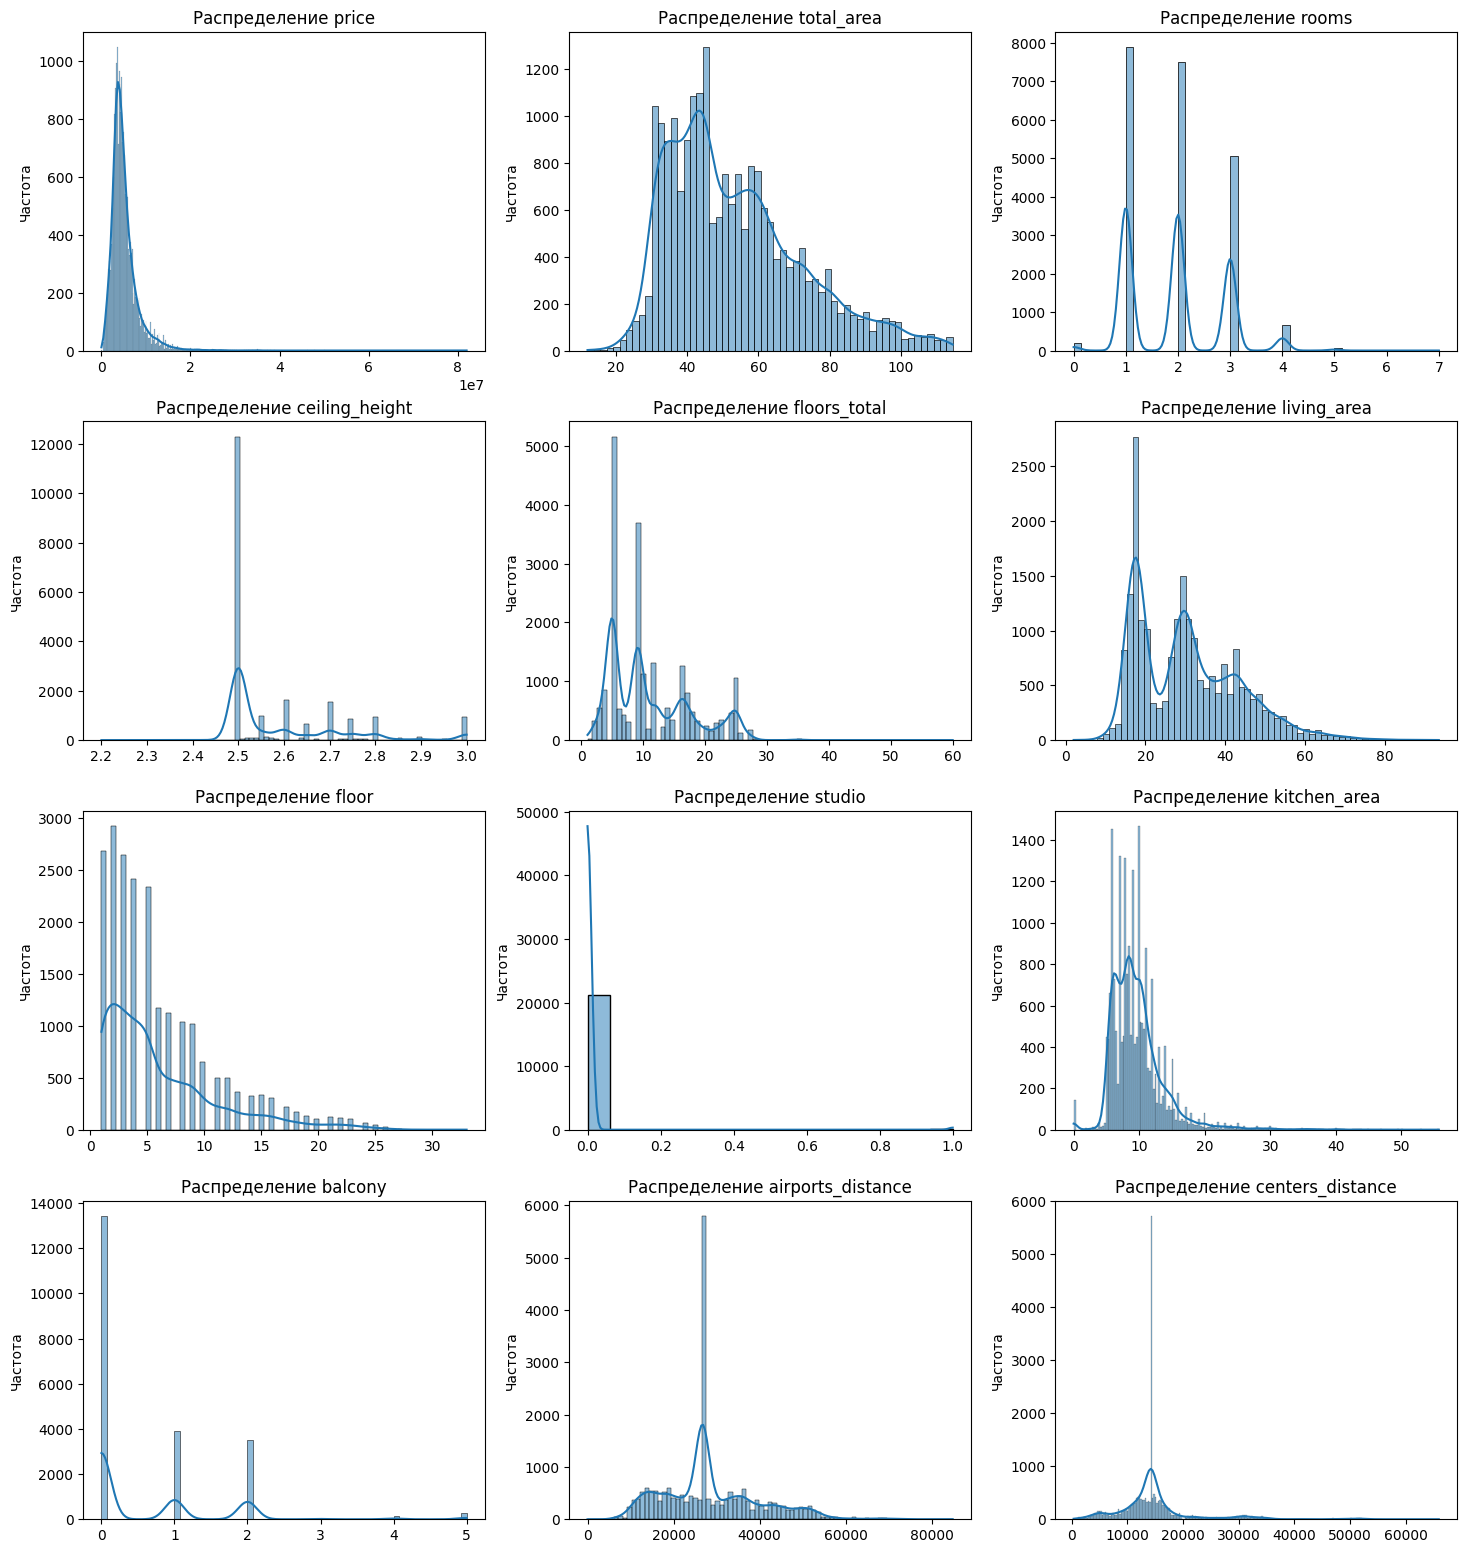

In [ ]:
num_columns = 3
num_rows = (len(data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns):
    row, col = divmod(i, num_columns)
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")


for i in range(len(data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
anomalies_living_area = data[(data['living_area'] > data['total_area']) | (data['kitchen_area'] > data['total_area'])]
print("Аномалии по жилой площади или площади кухни:")
print(anomalies_living_area)

Аномалии по жилой площади или площади кухни:
Empty DataFrame
Columns: [price, total_area, rooms, ceiling_height, floors_total, living_area, floor, studio, kitchen_area, balcony, airports_distance, centers_distance]
Index: []


In [ ]:
anomalies_floor = data[data['floor'] > data['floors_total']]
print("Аномалии по этажу:")
print(anomalies_floor)

Аномалии по этажу:
Empty DataFrame
Columns: [price, total_area, rooms, ceiling_height, floors_total, living_area, floor, studio, kitchen_area, balcony, airports_distance, centers_distance]
Index: []


In [ ]:
anomalies_rooms = data[(data['rooms'] > 1) & (data['studio'] == 1)]
print("Аномалии по количеству комнат в студии:")
print(anomalies_rooms)

Аномалии по количеству комнат в студии:
Empty DataFrame
Columns: [price, total_area, rooms, ceiling_height, floors_total, living_area, floor, studio, kitchen_area, balcony, airports_distance, centers_distance]
Index: []


Таким образом, предполагаемых аномалий не выявлено, а выбросы отсечены.

## 5. Добавление новых признаков

Попробуем добавить новые признаки на основе уже имеющихся данных:
1. Цена за квадратный метр - может быть полезно, потому что чаще всего в объявлениях о продаже квартир указывается в том числе цена за квадратный метр.
2. Отношение жилой площади к общей площади квартиры - пригодится, чтобы определить эффективность использования пространства в квартире.
3. Средняя площадь комнаты - можно узнать, насколько просторные комнаты в квартире.
4. Разница между общим количеством этажей и этажом, на котором располагается квартира - это может быть важно для людей, которые не хотели бы жить на верхних или, наоборот, нижних этажах
5. Признак, отражающий наличие поблизости аэропорта (в пределах 5 км) - это чтобы просто ориентироваться, есть ли в ближайших окрестностях аэропорт, и уменьшить влияние именно самого расстояния на работу модели.
6. Признак, отражающий близость к центру города (так же в пределах 5 км) - такая же логика, как и в предыдущем.

В процессе работы с 3 признаком было выявлено, что в некоторых квартирах количество комнат указано как 0. Предположительно такого быть не может, так как если это какое-либо помещение, что в нем как минимум одна комната - основная (даже если это студия или любой другой вид апартаментов). Поэтому было принято решение такие нулевые знаения заменить на единицы.

In [ ]:
data[data['rooms'] == 0]

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance
144,2450000.0,27.00,0,2.5,24.0,15.500000,2,1,0.000000,2.0,26726.0,14191.277833
349,2320000.0,25.00,0,2.5,14.0,17.000000,1,0,5.685397,0.0,26726.0,14191.277833
440,2480000.0,27.11,0,2.5,17.0,24.750000,4,1,0.000000,2.0,38171.0,15015.000000
508,3375000.0,34.40,0,2.5,26.0,24.300000,19,0,6.100827,1.0,53115.0,19292.000000
608,1850000.0,25.00,0,2.5,10.0,13.517436,7,1,0.000000,0.0,26726.0,14191.277833
...,...,...,...,...,...,...,...,...,...,...,...,...
23210,3200000.0,26.00,0,2.5,25.0,18.000000,16,1,0.000000,0.0,11405.0,13222.000000
23442,2500000.0,27.70,0,2.5,24.0,18.000000,4,0,6.167361,2.0,26726.0,14191.277833
23554,3350000.0,26.00,0,2.5,19.0,14.115395,8,1,0.000000,0.0,18090.0,17092.000000
23592,1450000.0,29.00,0,2.5,9.0,18.000000,8,0,6.558611,2.0,26726.0,14191.277833


In [ ]:
data['rooms'] = data['rooms'].replace(0, 1)

In [ ]:
data['price_per_sqm'] = data['price'] / data['total_area']

data['living_area_ratio'] = data['living_area'] / data['total_area']

data['mean_room_area'] = data['total_area'] / data['rooms']

data['floor_difference'] = data['floors_total'] - data['floor']

data['near_airport'] = (data['airports_distance'] < 5).astype(int)

data['near_center'] = (data['centers_distance'] < 5).astype(int)

data.head()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,price_per_sqm,living_area_ratio,mean_room_area,floor_difference,near_airport,near_center
0,13000000.0,108.0,3,2.7,16.0,51.0,8,0,25.0,0.0,18863.0,16028.000000,120370.370370,0.472222,36.0,8.0,0,0
1,3350000.0,40.4,1,2.5,11.0,18.6,1,0,11.0,2.0,12817.0,18603.000000,82920.792079,0.460396,40.4,10.0,0,0
2,5196000.0,56.0,2,2.5,5.0,34.3,4,0,8.3,0.0,21741.0,13933.000000,92785.714286,0.612500,28.0,1.0,0,0
5,2890000.0,30.4,1,2.5,12.0,14.4,5,0,9.1,0.0,26726.0,14191.277833,95065.789474,0.473684,30.4,7.0,0,0
6,3700000.0,37.3,1,2.5,26.0,10.6,6,0,14.4,1.0,52996.0,19143.000000,99195.710456,0.284182,37.3,20.0,0,0


In [ ]:
data.describe()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,price_per_sqm,living_area_ratio,mean_room_area,floor_difference,near_airport,near_center
count,2.134700e+04,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.000000,21347.0
mean,5.106977e+06,53.394697,1.930060,2.586891,11.043304,30.434033,6.032698,0.006652,9.652190,0.612264,28472.696819,14856.046463,94462.471601,0.562762,30.122393,5.010606,0.000047,0.0
std,3.123438e+06,18.762060,0.873916,0.134749,6.664308,12.891218,4.971479,0.081290,4.086249,0.958174,11304.714401,7207.998554,34849.606815,0.099874,8.389552,4.947945,0.006844,0.0
min,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,318.000000,111.834862,0.038462,8.000000,0.000000,0.000000,0.0
25%,3.300000e+06,39.000000,1.000000,2.500000,5.000000,18.300000,2.000000,0.000000,7.000000,0.000000,20860.000000,11870.000000,75000.000000,0.500000,23.400000,1.000000,0.000000,0.0
50%,4.400000e+06,49.400000,2.000000,2.500000,9.000000,29.000000,5.000000,0.000000,9.000000,0.000000,26726.000000,14191.277833,93333.333333,0.566667,29.200000,4.000000,0.000000,0.0
75%,6.000000e+06,64.000000,3.000000,2.650000,16.000000,39.100000,8.000000,0.000000,11.000000,1.000000,35068.000000,15561.000000,111111.111111,0.627907,35.400000,7.000000,0.000000,0.0
max,8.200000e+07,114.600000,7.000000,3.000000,60.000000,93.600000,33.000000,1.000000,55.700000,5.000000,84869.000000,65968.000000,719298.245614,1.000000,100.700000,56.000000,1.000000,0.0


## 6. Скалирование


Разница в значениях разных признаков очень большая (например, price и floor), поэтому выделим числовые признаки и нормируем их. Это позволит получать в дальнейшем более качественные предсказания модели.

In [ ]:
data.columns

Index(['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'studio', 'kitchen_area', 'balcony',
       'airports_distance', 'centers_distance', 'price_per_sqm',
       'living_area_ratio', 'mean_room_area', 'floor_difference',
       'near_airport', 'near_center'],
      dtype='object')

In [ ]:
numerical_features = ['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony',
       'airports_distance', 'centers_distance', 'price_per_sqm', 'living_area_ratio', 'mean_room_area', 'floor_difference']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
data.describe()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,price_per_sqm,living_area_ratio,mean_room_area,floor_difference,near_airport,near_center
count,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,21347.000000,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,2.134700e+04,21347.000000,21347.0
mean,7.056498e-17,3.355165e-16,1.125045e-16,3.388450e-16,-3.794532e-17,8.154915e-17,6.823500e-17,0.006652,-2.063693e-17,1.264844e-17,-4.094100e-17,-1.506163e-16,1.331415e-16,4.075793e-16,-2.255084e-16,-9.453044e-17,0.000047,0.0
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.081290,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.006844,0.0
min,-1.631185e+00,-2.206350e+00,-1.064269e+00,-2.871266e+00,-1.507064e+00,-2.205742e+00,-1.012338e+00,0.000000,-2.362170e+00,-6.390054e-01,-2.518716e+00,-2.016980e+00,-2.707429e+00,-5.249743e+00,-2.636960e+00,-1.012688e+00,0.000000,0.0
25%,-5.785353e-01,-7.672417e-01,-1.064269e+00,-6.448535e-01,-9.068377e-01,-9.412855e-01,-8.111857e-01,0.000000,-6.490676e-01,-6.390054e-01,-6.734248e-01,-4.142782e-01,-5.584834e-01,-6.284262e-01,-8.013003e-01,-8.105790e-01,0.000000,0.0
50%,-2.263510e-01,-2.129186e-01,8.003192e-02,-6.448535e-01,-3.066113e-01,-1.112437e-01,-2.077293e-01,0.000000,-1.596098e-01,-6.390054e-01,-1.545141e-01,-9.222868e-02,-3.240107e-02,3.909731e-02,-1.099480e-01,-2.042525e-01,0.000000,0.0
75%,2.859170e-01,5.652658e-01,1.224333e+00,4.683529e-01,7.437849e-01,6.722537e-01,3.957270e-01,0.000000,3.298480e-01,4.046708e-01,5.834254e-01,9.780386e-02,4.777394e-01,6.522875e-01,6.290838e-01,4.020740e-01,0.000000,0.0
max,2.461865e+01,3.262261e+00,5.801537e+00,3.065834e+00,7.346275e+00,4.900037e+00,5.424530e+00,1.000000,1.126923e+01,4.579376e+00,4.988859e+00,7.091171e+00,1.792991e+01,4.378000e+00,8.412757e+00,1.030541e+01,1.000000,0.0


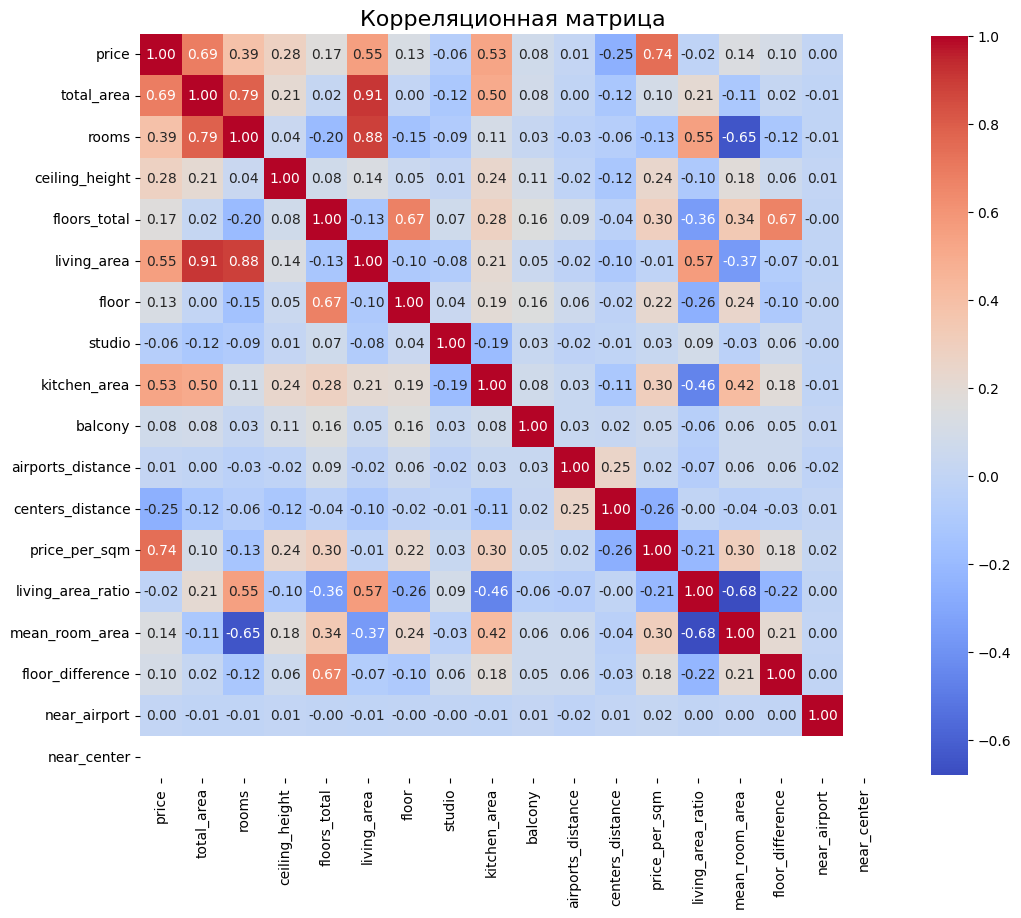

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

## 7. Обучение и тестирование модели, определение важности признаков

Была выбрана модель регрессора случайного леса, так как она показывает более высокую точность, чем например более простая модель линейной регрессии. Кроме того она более устойчива к выбросам и подходит для анализа важности признаков.
Удалим для теста признак цены за квадратный метр, так как он получен в том числе с помощью значений price, поэтому работа модели может быть некорректной

In [ ]:
data.columns

Index(['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'studio', 'kitchen_area', 'balcony',
       'airports_distance', 'centers_distance', 'price_per_sqm',
       'living_area_ratio', 'mean_room_area', 'floor_difference',
       'near_airport', 'near_center'],
      dtype='object')

In [ ]:
columns = ['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'studio', 'kitchen_area', 'balcony', 'airports_distance', 'centers_distance',
       'living_area_ratio', 'mean_room_area', 'floor_difference', 'near_airport', 'near_center']
data1 = data[columns]

MAE: 0.25686056660656237
MSE: 0.22634409661927887


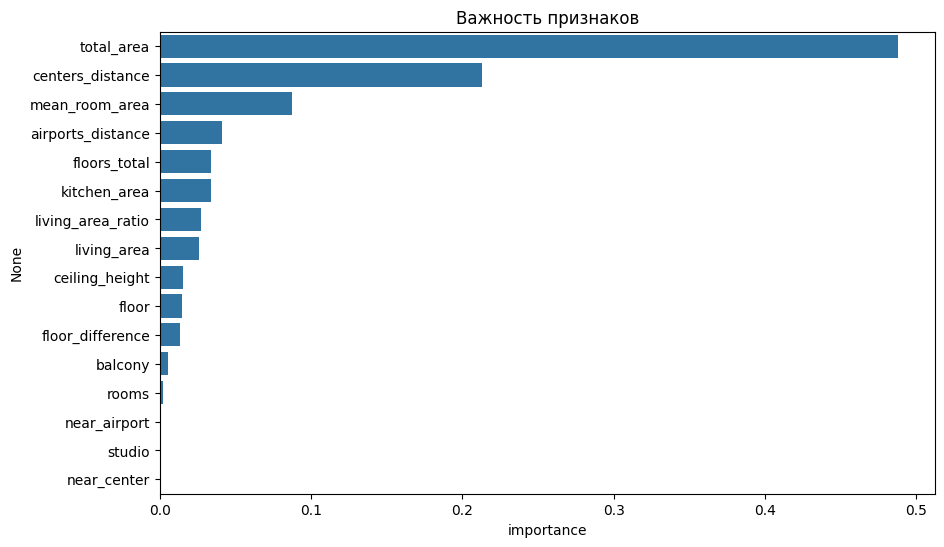

In [ ]:
X = data1.drop('price', axis=1)
y = data1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')


importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Важность признаков')
plt.show()

Кроме того, инструмент SelectFromModel дает такой же результат

In [ ]:
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['total_area', 'centers_distance', 'mean_room_area'], dtype='object')


Так же для полноты картины можно оценить ошибку на кросс-валидации

In [ ]:
X_selected = X[selected_features]
scores = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
print("Средняя ошибка на кросс-валидации:", -scores.mean())

Средняя ошибка на кросс-валидации: 0.3047528660373855


Модель LGBMRegressor для сравнения оценки важности признаков:

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 17077, number of used features: 14
[LightGBM] [Info] Start training from score 0.001493
Mean Squared Error: 0.2397361668594892
Mean Absolute Error: 0.25894745885943743


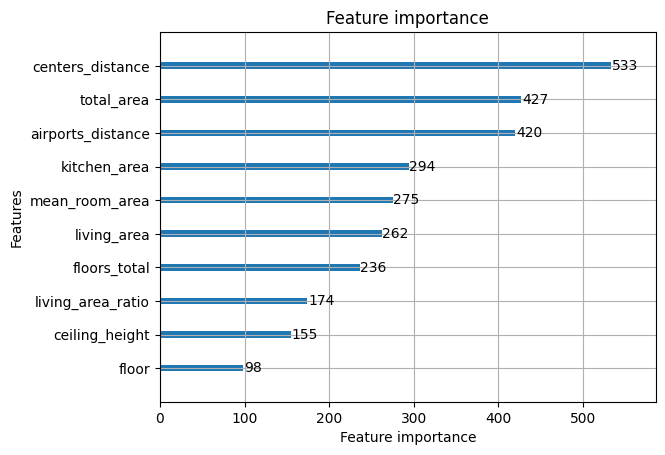

In [ ]:
X = data1.drop('price', axis=1)
y = data1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

lgb.plot_importance(model, max_num_features=10)
plt.show()

Можно также сравнить важность признаков для предсказания цены за квадратный метр

In [ ]:
columns = ['price_per_sqm', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'studio', 'kitchen_area', 'balcony', 'airports_distance', 'centers_distance',
       'living_area_ratio', 'mean_room_area', 'floor_difference', 'near_airport', 'near_center']
data2 = data[columns]

MAE: 0.38069965234262065
MSE: 0.32724623974001593


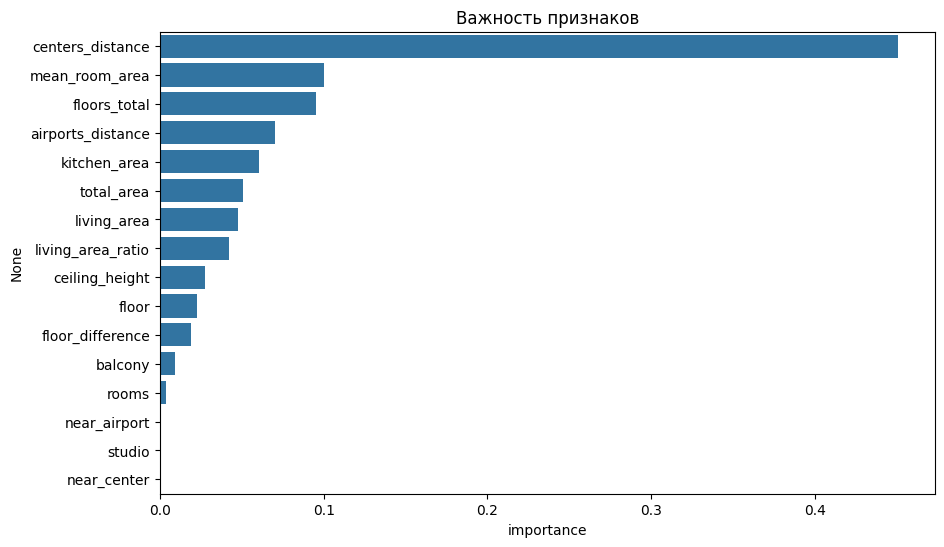

In [ ]:
X = data2.drop('price_per_sqm', axis=1)
y = data2['price_per_sqm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')


importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Важность признаков')
plt.show()

In [ ]:
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['floors_total', 'airports_distance', 'centers_distance',
       'mean_room_area'],
      dtype='object')


Таким образом, для разных моделей при предсказании price выявлены следующие наиболее важные признаки: total_area и centers_distance. Кроме того в модели регрессора случайного леса третий важный признак - mean_room_area, а в модели LightGBM - airports_distance.

Для предсказания цены за квадратный метр наиболее важными оказались признаки floors_total, airports_distance, centers_distance, mean_room_area.

## 8. Кластеризация (группировка)

Для выделения различных групп, внутри которых влияние характеристик на цену различаются между группами, можно использовать инструменты кластеризации. Например, метод k-средних, с помощью которого мы сгруппируем данные на основе сходных характеристик на три кластера.

Затем для каждого кластера обучим и протестируем модель регресии для предсказания цены и сравним важность признака в каждой из групп.

Cluster 1:
MAE: 0.5169934392558375
MSE: 0.8043114505885721
---
Cluster 0:
MAE: 0.16730620781165678
MSE: 0.06704063523347567
---
Cluster 2:
MAE: 0.22037503762201466
MSE: 0.11507474794628754
---


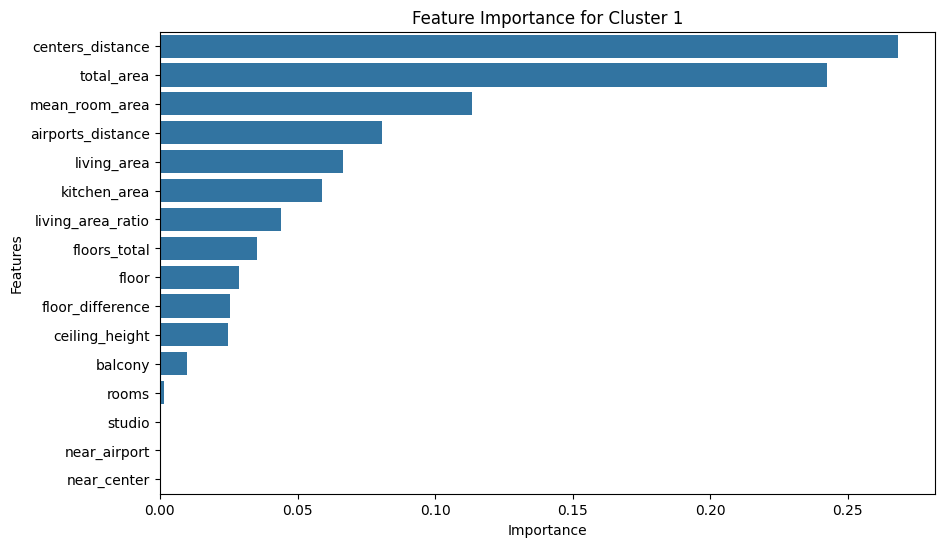

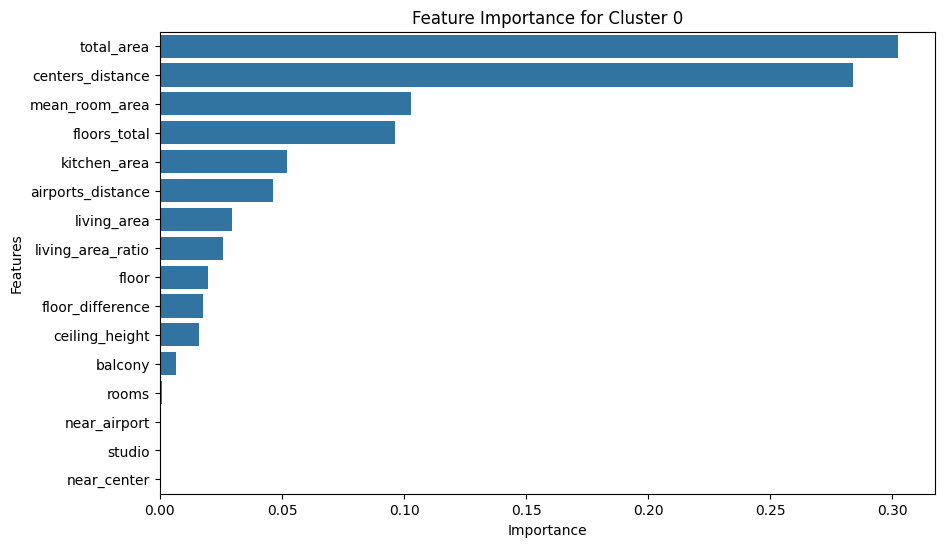

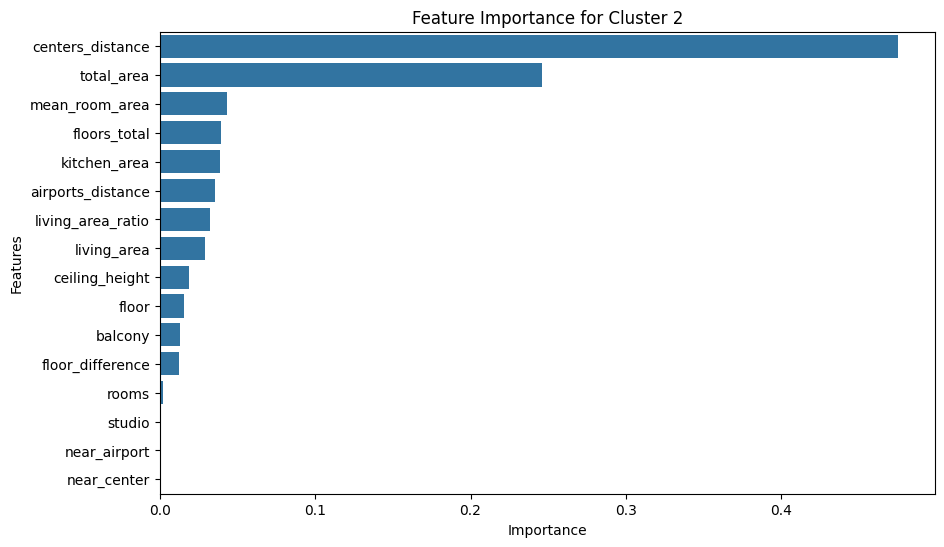

In [ ]:
data3 = data[['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'studio', 'kitchen_area', 'balcony', 'airports_distance', 'centers_distance',
       'living_area_ratio', 'mean_room_area', 'floor_difference', 'near_airport', 'near_center']]

X = data3.drop('price', axis=1)
y = data3['price']

kmeans = KMeans(n_clusters=3, random_state=42)
data3['cluster'] = kmeans.fit_predict(X)

results = {}
for cluster in data3['cluster'].unique():
    cluster_data = data3[data3['cluster'] == cluster]
    X_cluster = cluster_data.drop(['price', 'cluster'], axis=1)
    y_cluster = cluster_data['price']

    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    importance = model.feature_importances_

    results[cluster] = {
        'mae': mae,
        'mse': mse,
        'importance': importance
    }

for cluster, metrics in results.items():
    print(f'Cluster {cluster}:')
    print(f'MAE: {metrics["mae"]}')
    print(f'MSE: {metrics["mse"]}')
    print('---')

for cluster in data3['cluster'].unique():
    importance = pd.DataFrame(results[cluster]['importance'], index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance['importance'], y=importance.index)
    plt.title(f'Feature Importance for Cluster {cluster}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

Несмотря на то, что во всех трех кластерах наиболее важными оказались такие признаки как centers_distance и total_area, их соотношения все же достаточно сильно отличаются.

Как вариант, следующим этапом работы может быть проведение кластеризации еще раз после удоления этих двух признаков.

Визуализируем кластеры. Несмотря на то, что общее правило кластеризации определить сложно, некоторая закономерность все же прослеживается.

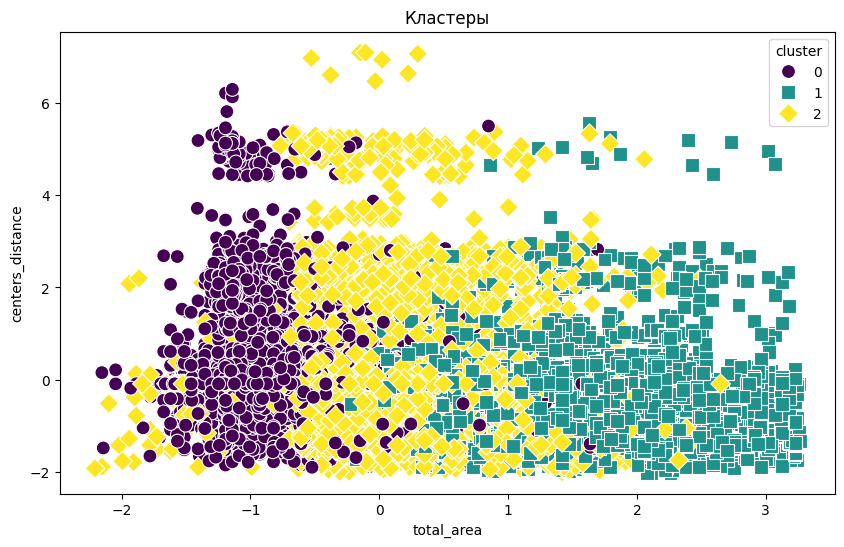

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x='total_area', y='centers_distance', hue='cluster', palette='viridis', style='cluster', markers=['o', 's', 'D'], s=100)
plt.title('Кластеры')
plt.xlabel('total_area')
plt.ylabel('centers_distance')
plt.legend(title='cluster')
plt.show()